# Covid19 dataset around the World
## by Maryam Ashtari

## Preliminary Wrangling

> This dataset has coronavirus(covid-19) data around the world. It has the quantity over time and numbers of recovered and all death around the world.   

In [242]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
%matplotlib inline

In [243]:
df=pd.read_csv('covid19.csv')

In [244]:
print(df.shape)
print(df.dtypes)
print(df.head(5))

(16874, 8)
Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
dtype: object
  Province/State Country/Region      Lat      Long       Date  Confirmed  \
0            NaN       Thailand  15.0000  101.0000  1/22/2020          2   
1            NaN          Japan  36.0000  138.0000  1/22/2020          2   
2            NaN      Singapore   1.2833  103.8333  1/22/2020          0   
3            NaN          Nepal  28.1667   84.2500  1/22/2020          0   
4            NaN       Malaysia   2.5000  112.5000  1/22/2020          0   

   Deaths  Recovered  
0       0          0  
1       0          0  
2       0          0  
3       0          0  
4       0          0  


In [245]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000
mean,25.786281,6.054692,269.852317,9.157046,100.349354
std,23.258322,80.799786,3249.807685,141.030937,1737.999318
min,-41.454500,-157.498300,0.000000,0.000000,0.000000
25%,12.984300,-71.543000,0.000000,0.000000,0.000000
50%,32.313000,11.221450,0.000000,0.000000,0.000000
75%,42.315400,66.923700,7.000000,0.000000,0.000000
max,71.706900,178.065000,67800.000000,4032.000000,58382.000000


### What is the structure of your dataset?

There are 134992 data in the dataset with 8 features (Country, State/province, latitude, longtitude, no. of confirmed patients, no. of death, number of recovered and date). Most variables are numeric, but country and state are nominal variables.
### What is/are the main feature(s) of interest in your dataset?

> I am more interested to see how rate of confirmed cases changes especially in US, Canada, Iran and some europian countries. Does the plot get flat at some point(rate become zero)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>One important factor is time. Also, the country name based on their attention to contain desease could be important.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

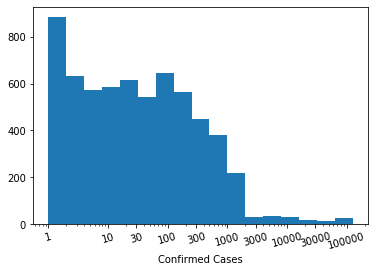

In [246]:
np.exp(df['Confirmed'].describe())
bins=10**np.arange(0,4.9+0.3,0.3)
plt.hist(data =df, x = 'Confirmed', bins = bins);
plt.xscale('log');
plt.xlabel('Confirmed Cases')
tick_locs=[1,10,30,100,300,1000,3000,10000,30000,100000]
plt.xticks(tick_locs, tick_locs)
plt.xticks(rotation=15);
plt.show()


There are more cases at low end (1) in regions in comparison to high end. So, it seems in most of places it just has started but also have 
cases higher than 30000. Most of the cases are between 5-1000 in different regions.

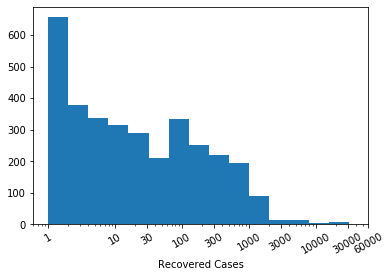

In [248]:
np.log10(df['Recovered'].describe())
bins=10**np.arange(0,np.log10(df['Recovered'].max()),0.3)
plt.hist(data =df, x = 'Recovered', bins = bins);
plt.xscale('log');
plt.xlabel('Recovered Cases')
tick_locs=[1,10,30,100,300,1000,3000,10000,30000,60000]
plt.xticks(tick_locs, tick_locs)
plt.xticks(rotation=30);
plt.show();


The recovered cases seems to have the same trend of confirmed cases. It shows in most of the cases, the patient will recover 
from the desease.

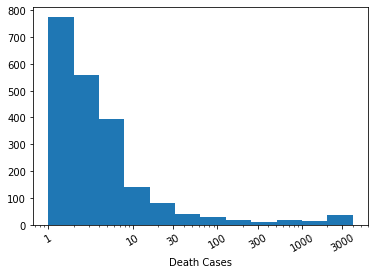

In [249]:
np.log10(df['Deaths'].describe())
bins=10**np.arange(0,np.log10(df['Deaths'].max()),0.3)
plt.hist(data =df, x = 'Deaths', bins = bins);
plt.xscale('log');
plt.xlabel('Death Cases')
tick_locs=[1,10,30,100,300,1000,3000]
plt.xticks(tick_locs, tick_locs)
plt.xticks(rotation=30);
plt.show()


The graph seemed to skwed to the right. So, there are definitely much less death compared to recovered cases. The trend seems to show
death cases to recovered ratio is around 1/20.

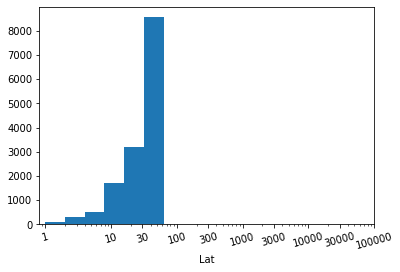

In [250]:

bins=10**np.arange(0,np.log10(df['Lat'].max()),0.3)
plt.hist(data =df, x = 'Lat', bins = bins);
plt.xscale('log');
plt.xlabel('Lat')
tick_locs=[1,10,30,100,300,1000,3000,10000,30000,100000]
plt.xticks(tick_locs, tick_locs)
plt.xticks(rotation=15);
plt.show()

In [251]:
df=df.rename(columns={"Country/Region": "Country", "Province/State": "State"})
df.drop_duplicates(inplace=True)
df.shape

(16874, 8)

In [252]:
df['Date']=pd.to_datetime(df['Date'])
date_max=df['Date'].max()
df['MM-DD'] = df['Date'].dt.strftime('%m-%d')


df['Duration']=date_max-df['Date']
df['Active']=df['Confirmed']-df['Recovered']-df['Deaths']


In [253]:
df_US=df.query('Country=="US"')
df_US.head(5)
df_US_State=df_US.groupby('State')['Confirmed','Recovered','Deaths', 'Active'].sum().reset_index()

In [254]:
df_Italy=df.query('Country=="Italy"')


In [255]:
df_Iran=df.query('Country=="Iran"')


In [256]:
df_China=df.query('Country=="China"')


In [257]:
df_Korea=df.query('Country=="Korea, South"')


The above table shows the cases around the world

In [258]:


df_max=df.query('Date=="2020-03-20"')
df_max_tot=df_max.groupby('Date')['Confirmed', 'Recovered', 'Deaths','Active'].sum().reset_index()
df_max_tot

,Date,Confirmed,Recovered,Deaths,Active
0,2020-03-20,272166,87256,11299,173611


In [259]:
df_US_max=df_US.query('Date=="2020-03-20"')
df_US_max_tot=df_US_max.groupby('Date')['Confirmed', 'Recovered', 'Deaths','Active'].sum().reset_index()
df_US_max_tot

,Date,Confirmed,Recovered,Deaths,Active
0,2020-03-20,19100,0,244,18856


In [260]:
df_Iran_max=df_Iran.query('Date=="2020-03-20"')
df_Iran_max_tot=df_Iran_max.groupby('Date')['Confirmed', 'Recovered', 'Deaths','Active'].sum().reset_index()
df_Iran_max_tot

,Date,Confirmed,Recovered,Deaths,Active
0,2020-03-20,19644,6745,1433,11466


In [261]:
df_Italy_max=df_Italy.query('Date=="2020-03-20"')
df_Italy_max_tot=df_Italy_max.groupby('Date')['Confirmed', 'Recovered', 'Deaths','Active'].sum().reset_index()
df_Italy_max_tot

,Date,Confirmed,Recovered,Deaths,Active
0,2020-03-20,47021,4440,4032,38549


In [262]:
df_Korea_max=df_Korea.query('Date=="2020-03-20"')
df_Korea_max_tot=df_Korea_max.groupby('Date')['Confirmed', 'Recovered', 'Deaths','Active'].sum().reset_index()
df_Korea_max_tot

,Date,Confirmed,Recovered,Deaths,Active
0,2020-03-20,8652,1540,94,7018


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I did log transformation on recovered, confirmed and death cases because it was easier to see distribution in that way
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I converted date to datetime type.Also, I renamed some columns as it was not easy to work with original name. At the end, I separated some countries of interest to investigate the trends for them. In that way, I could get the latest data for some countries of interest like US, Italy, Iran and Korea.

## Bivariate Exploration



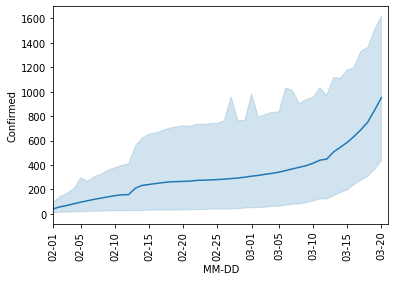

In [263]:

sb.lineplot(data=df, x='MM-DD', y='Confirmed')
tick_locs=['02-01','02-05','02-10','02-15','02-20','02-25','03-01','03-05','03-10','03-15','03-20']
plt.xticks(tick_locs, tick_locs)
plt.xticks(rotation=90);
plt.xlim(('02-01', '03-30'));
plt.show()


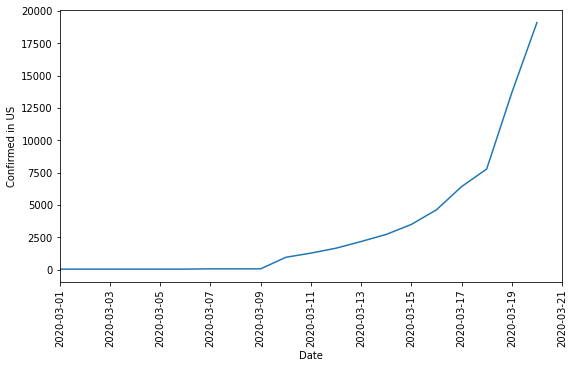

In [164]:
df_US_Date=df_US.groupby('Date')['Confirmed', 'Recovered','Deaths','Active'].sum().reset_index()
plt.figure(figsize=[9,5])
sb.lineplot(data=df_US_Date, x='Date', y='Confirmed')

plt.xticks(rotation=90);
plt.xlim(('2020-03-01', '2020-03-21'));
plt.ylabel('Confirmed in US')
plt.show();


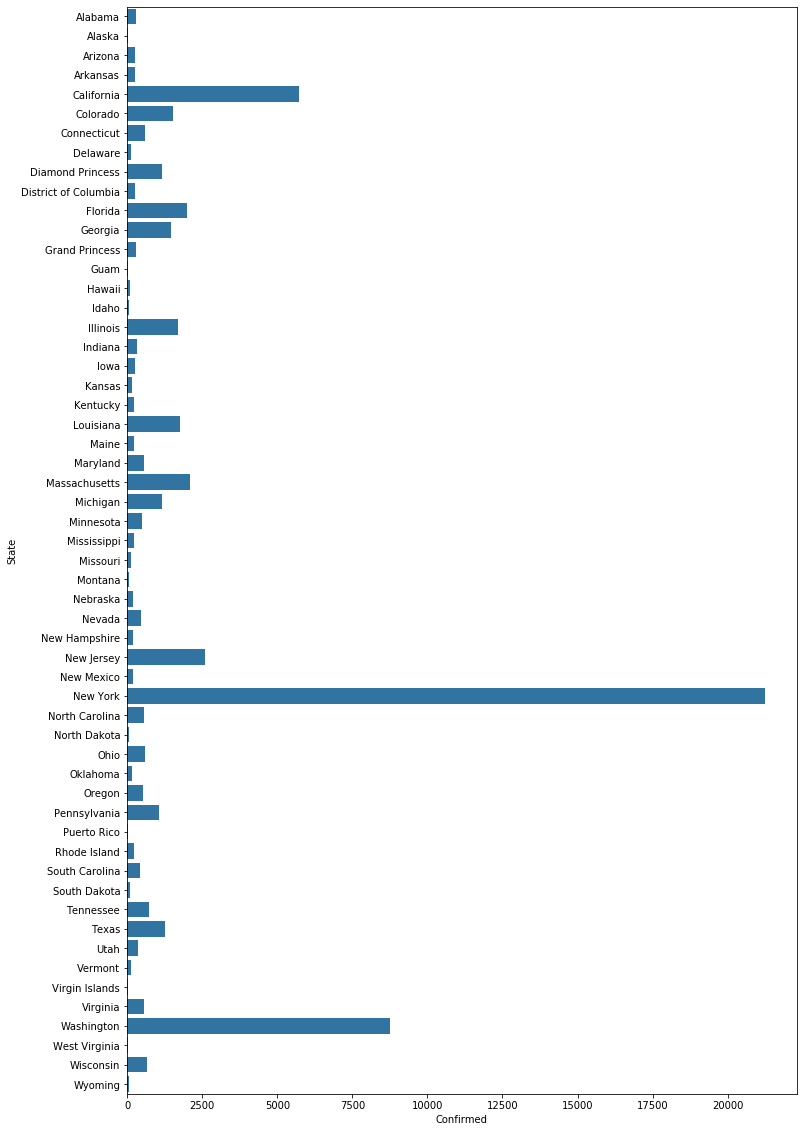

In [146]:
plt.figure(figsize=[12,20])
base_color=sb.color_palette()[0]
sb.barplot(data=df_US_State, x='Confirmed',y='State', color=base_color)

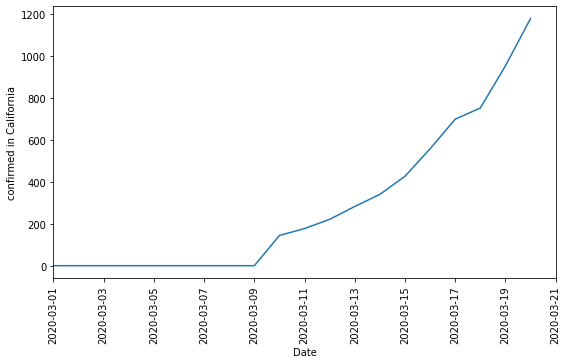

In [264]:
df_California=df.query('State=="California"')

df_California_Date=df_California.groupby('Date')['Confirmed', 'Recovered','Deaths','Active'].sum().reset_index()
plt.figure(figsize=[9,5])
sb.lineplot(data=df_California_Date, x='Date', y='Confirmed')

plt.xticks(rotation=90);
plt.xlim(('2020-03-01', '2020-03-21'));
plt.ylabel('confirmed in California')
plt.show();


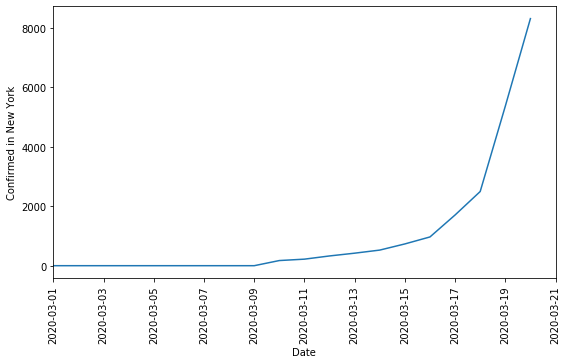

In [265]:
df_NewYork=df.query('State=="New York"')

df_NewYork_Date=df_NewYork.groupby('Date')['Confirmed', 'Recovered','Deaths','Active'].sum().reset_index()
plt.figure(figsize=[9,5])
sb.lineplot(data=df_NewYork_Date, x='Date', y='Confirmed')

plt.xticks(rotation=90);
plt.xlim(('2020-03-01', '2020-03-21'));
plt.ylabel('Confirmed in New York')
plt.show();

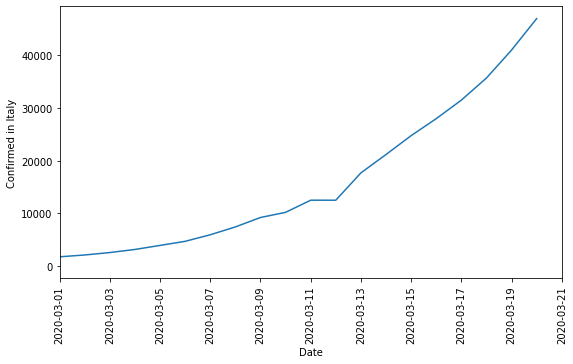

In [167]:
df_Italy_Date=df_Italy.groupby('Date')['Confirmed', 'Recovered','Deaths','Active'].sum().reset_index()
plt.figure(figsize=[9,5])
sb.lineplot(data=df_Italy_Date, x='Date', y='Confirmed')

plt.xticks(rotation=90);
plt.xlim(('2020-03-01', '2020-03-21'));
plt.ylabel('Confirmed in Italy')
plt.show();

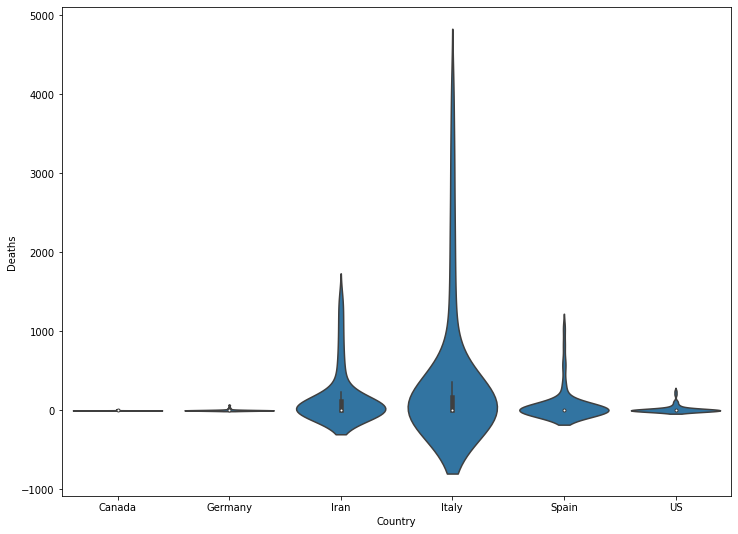

In [268]:
Countries=['US', 'Italy', 'Canada','Iran','Germany','Spain']
plt.figure(figsize=[12,9])

base_color=sb.color_palette()[0]
df_fraction=df[df['Country'].isin(Countries)]
df_fraction=df_fraction.groupby(['Date','Country'])['Confirmed', 'Recovered','Deaths','Active','Country'].sum().reset_index()

sb.violinplot(data=df_fraction, x='Country', y='Deaths', color=base_color, scale='count')

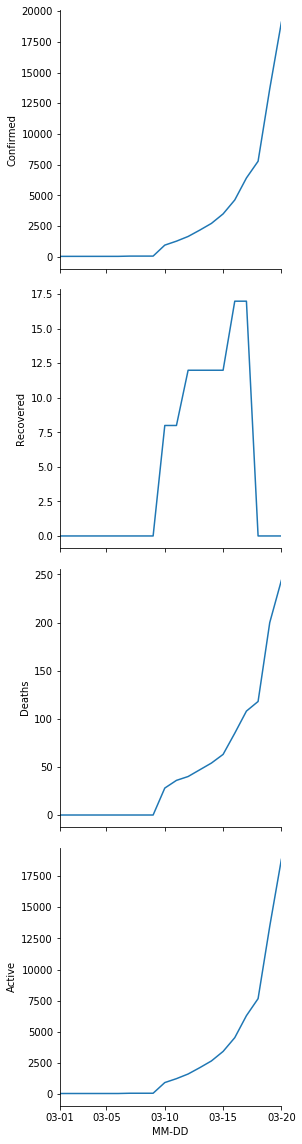

In [231]:
df_US_Date['MM-DD'] = df_US_Date['Date'].dt.strftime('%m-%d')

g=sb.PairGrid(data=df_US_Date, x_vars=['MM-DD'],y_vars=['Confirmed', 'Recovered', 'Deaths','Active'],size=4, height=3 )
g.map(sb.lineplot)
g.set(xticks=['03-01', '03-05','03-10','03-15', '03-20'], xlim=('03-01','03-20'));


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Time series plots in all cases show that the trend in all countries are exponential. In US, the rate of cases is increasing. Also the violin plot for toal deaths over time in countries shows that Italy has the highest death beside Iran
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Statewise comparison in barplot showed that NewYork, Washington and California has the highest cases. The main problem is Newyork probably because of population density there.
It seems the active cases, the deaths and total confirmed cases all follows exponential curve while recovered cases are more like step function.

## Multivariate Exploration



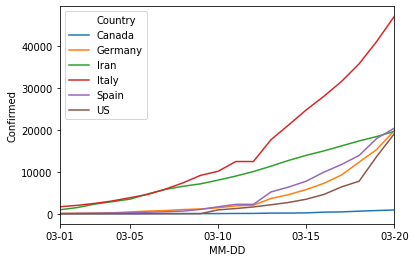

In [274]:
df_fraction['MM-DD'] = df_fraction['Date'].dt.strftime('%m-%d')

ax=sb.lineplot(data=df_fraction, x='MM-DD',y='Confirmed',hue='Country')
ax.set(xticks=['03-01', '03-05','03-10','03-15', '03-20'], xlim=('03-01','03-20'));


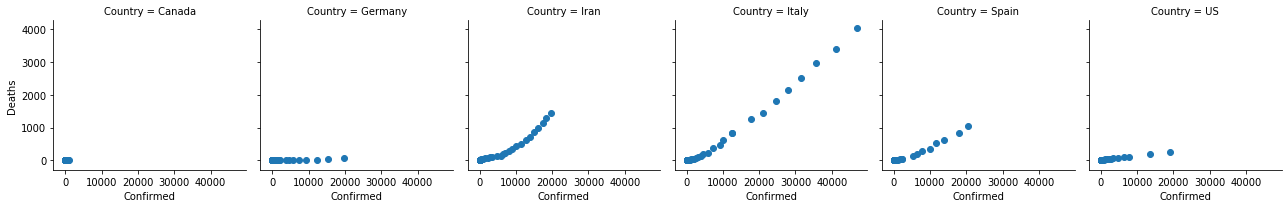

In [273]:
g=sb.FacetGrid(data=df_fraction, col='Country', size=3)
g.map(plt.scatter, 'Confirmed', 'Deaths');

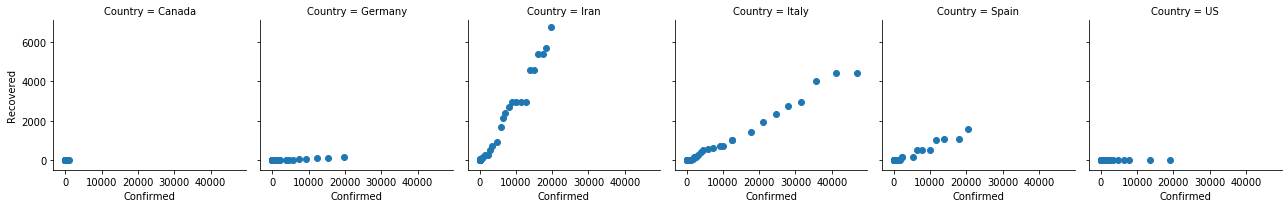

In [272]:
g=sb.FacetGrid(data=df_fraction, col='Country', size=3)
g.map(plt.scatter, 'Confirmed', 'Recovered');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Plotting time-series data for each country together let us to compare different countries to gether. If we compare rate of confirmed cases in each country together, we see interesting points. For example, Italy has the highest rate for confirmed cases. Although, US has lower cases compared Italy but the rate of confirmed cases are more than Iran or Spain. Canada has the lowest rate in these countries of interest
### Were there any interesting or surprising interactions between features?


> There is positive relationship between quantity of cases and deaths. Although, US and Germany have the same quantity of cases as spain or Iran, it has lower death. Italy has the highest deaths between these countries . Iran also has more deaths in the confirmed cases.
For the recovered cases, it seems Iran has the highest recovered cases. the spain recovered cases also increasing while for Italy, US and Germany, the recovered versus confirmed got flat.